### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data_df = pd.read_csv('data.csv')
item_df = pd.read_csv('item.csv')
user_df = pd.read_csv('user.csv')

In [3]:
# data_df.head()

In [4]:
data_df.name = 'data_df'
item_df.name = 'item_df'
user_df.name = 'user_df'

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
def eda_1(df):
    info     = df.info()
    shape    = df.shape
    describe = df.describe()
    missing  = df.isnull().sum().sort_values(ascending=False)
    return (print('DATAFRAME NAME:'),
            print(df.name),
            print(),
            print('INFO:'), 
            print(info),
            print(),
            print('SHAPE:'),
            print(shape),
            print(),
            print('DESCRIBE:'),
            print(describe),
            print(),
            print('MISSING:'),
            print(missing),
            print())            

In [6]:
df_list = [data_df, item_df, user_df]
for df in df_list: eda_1(df)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
DATAFRAME NAME:
data_df

INFO:
None

SHAPE:
(100000, 4)

DESCRIBE:
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000      

#### 4. Find the number of movies per genre using the item data - 5 marks

In [7]:
# use sum on the default axis

In [8]:
#item_df.sum()
item_df.loc[:, 'Action':'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [9]:
#hint: use sum on the axis=1 
item_df[item_df.loc[:, 'Action':'Western'].sum(axis=1)>1][['movie id', 'movie title']]

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
3,4,Get Shorty
4,5,Copycat
6,7,Twelve Monkeys
7,8,Babe
9,10,Richard III
10,11,Seven (Se7en)
11,12,"Usual Suspects, The"
13,14,"Postino, Il"


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [10]:
item_df.shape

(1681, 22)

In [11]:
item_df[item_df['unknown'] ==1] 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# we might need item data set later, so let's create a item2_df that holds all the data except the dropped row.
item2_df = item_df[item_df['unknown'] !=1]

In [13]:
# item2_df should have 1 fewer row than item_df ... and it does...
item2_df.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [14]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [15]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [16]:
# your answers here
# where is the data I need...
# look at user_df
user_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
# look at data_df
data_df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


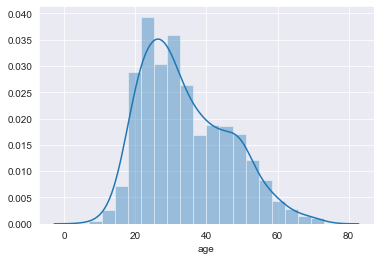

In [18]:
# AGE
sns.distplot(user_df.age);

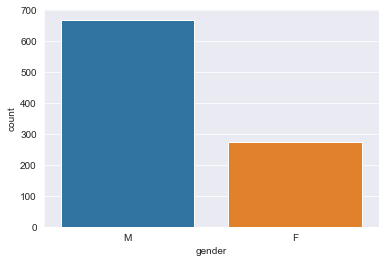

In [19]:
# GENDER
sns.countplot(user_df.gender);

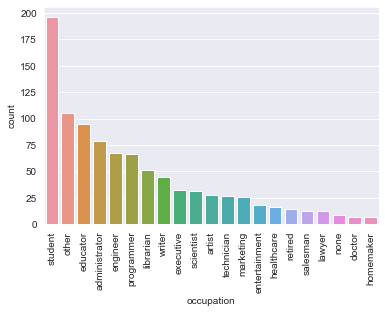

In [20]:
# OCCUPATION
sns.countplot(x='occupation',
              data = user_df,
              order = user_df['occupation'].value_counts().index)
plt.xticks(rotation = 90);

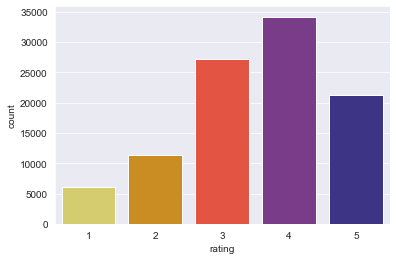

In [21]:
# RATING
sns.countplot(data_df.rating, palette = 'CMRmap_r');

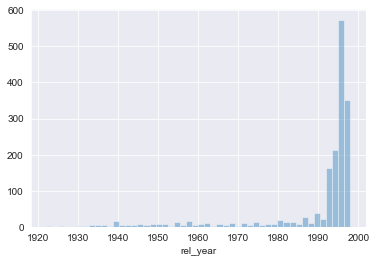

In [22]:
# RELEASE YEAR
item_df['rel_date'] = pd.to_datetime(item_df['release date'])
item_df['rel_year'] = item_df['rel_date'].dt.year
sns.distplot(item_df['rel_year'], kde = False);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

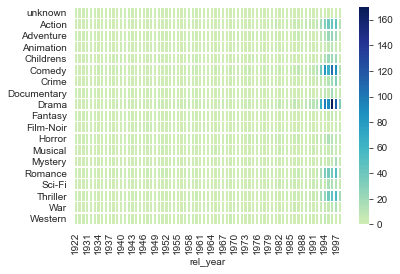

In [23]:
#Your answer here
# item_df.head(5)
year_genre_df = item_df.drop('movie id', axis=1)
year_genre_df = year_genre_df.groupby('rel_year').sum()
# year_genre_df.tail()
# transpose because I prefer the year on the x-axis
year_genre_transpose_df = year_genre_df.transpose()
sns.heatmap(year_genre_transpose_df, 
           cmap = 'YlGnBu', 
           linewidths = 0.5,
           center = 60
           );

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [24]:
#your answer here
# data_df.head()

In [25]:
# for each movie (groupby movie id) get the count and mean of its ratings
m_c_df = data_df.groupby(['movie id'])['rating'].describe()[['count', 'mean']]
m_c_df.head()

,count,mean
movie id,,
1,452.0,3.878319
2,131.0,3.206107
3,90.0,3.033333
4,209.0,3.550239
5,86.0,3.302326


In [26]:
# then, keep only those movies that had greater than 100 review counts
m_c_gt100_df = m_c_df[m_c_df['count']>100]
m_c_gt100_df.head()

,count,mean
movie id,,
1,452.0,3.878319
2,131.0,3.206107
4,209.0,3.550239
7,392.0,3.798469
8,219.0,3.995434


In [27]:
# grab the movie ids and movie titles
m_t_df = item_df[['movie id', 'movie title']].set_index('movie id')
m_t_df.head()

,movie title
movie id,
1,Toy Story
2,GoldenEye
3,Four Rooms
4,Get Shorty
5,Copycat


In [28]:
# combine the movie reviews with the movie titles
m_c_gt100_t_df = m_c_gt100_df.join(m_t_df, how = 'left')
m_c_gt100_t_df.head()

,count,mean,movie title
movie id,,,
1,452.0,3.878319,Toy Story
2,131.0,3.206107,GoldenEye
4,209.0,3.550239,Get Shorty
7,392.0,3.798469,Twelve Monkeys
8,219.0,3.995434,Babe


In [29]:
# rank the movies by mean rating and show top 25
m_c_gt100_t_df.sort_values(by = ['mean'], ascending = False).head(25)

,count,mean,movie title
movie id,,,
408,112.0,4.491071,"Close Shave, A"
318,298.0,4.466443,Schindler's List
169,118.0,4.466102,"Wrong Trousers, The"
483,243.0,4.456790,Casablanca
64,283.0,4.445230,"Shawshank Redemption, The"
603,209.0,4.387560,Rear Window
12,267.0,4.385768,"Usual Suspects, The"
50,583.0,4.358491,Star Wars
178,125.0,4.344000,12 Angry Men


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


In [30]:
# where are the genres?
item_df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rel_date,rel_year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995-01-01,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995-01-01,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995-01-01,1995


In [31]:
# where is the gender?
user_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [32]:
# where is the mapping between movid id and user id?
data_df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [33]:
# need to know size of 1:1 mapping table - that helps me know if I have the correct number of rows.
data_df.shape

(100000, 4)

In [34]:
# merge the users to the 1:1 mapping table 
merge_user_df = pd.merge(left = user_df, right = data_df, how = 'inner', on='user id')
# check to see I have the correct number of rows...
merge_user_df.shape

(100000, 8)

In [35]:
# merge in the movie information...
merge_user_movie_df = pd.merge(left = merge_user_df, right = item_df, how = 'inner', on = 'movie id')
# check correct number of rows... 
# hmmm... missing 9 rows... from where? 
merge_user_movie_df.shape

(99991, 31)

In [36]:
# 9 missing are probably from difference in unique movie ids between data_df and items_dflen
# which movie is missing? did it have 9 reviews?
# movie id = 267 had 9 movie reviews but that movie is not in the item_df... that explains the 9 missing rows.
data_movie_list = data_df['movie id'].unique()
item_movie_list = item_df['movie id'].unique()
missing = list(set(data_movie_list) - set(item_movie_list))
print(missing)
print(data_df['movie id'][data_df['movie id'] == 267].shape)

[267]
(9,)


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [37]:
# Reminder...
# 10. See gender distribution across different genres check for the validity of the below statements - 10 marks
# Men watch more drama than women
# Women watch more Sci-Fi than men
# Men watch more Romance than women


#### Conclusion:



In [38]:
# Do men watch more drama than women?
mum_df = merge_user_movie_df.copy()
mum_df.head()
# mum_df.groupby(['gender', 'Drama']).value_counts() # hmmm... this doesn't work...
# pd.crosstab(mum_df.gender, mum_df.Drama)           # this gives absolute counts, but 3x more M v F in data
pd.crosstab(mum_df.gender, mum_df.Drama, normalize = 'index')

# Men watch slightly less drama than women (42.8% of F vs. 38.9% of M watch Drama)

Drama,0,1
gender,,
F,0.572306,0.427694
M,0.610965,0.389035


In [39]:
# Do Women watch more Sci-Fi than men?
pd.crosstab(mum_df.gender, mum_df['Sci-Fi'], normalize = 'index')
# No, Men (13.6%) watch slightly more Sci-Fi than Women (10.2%)

Sci-Fi,0,1
gender,,
F,0.897855,0.102145
M,0.863965,0.136035


In [40]:
# Do Men watch more Romance than women?
pd.crosstab(mum_df.gender, mum_df['Romance'], normalize = 'index')
# No, Women (22.76%) watch more Romance than do Men (18.32%)


Romance,0,1
gender,,
F,0.772399,0.227601
M,0.816802,0.183198
